In [1]:
import sys
sys.path.append('../scripts')
import data_prep

In [2]:
import matplotlib.pyplot as plt 
from data_prep import data_prep

Importing the data

In [3]:
df = data_prep.load_data("../src/data/MachineLearningRating_v3.txt")

c:\Users\Excellerent55\Desktop\samri folder\Insurance_Risk_prediction-\notebooks\../scripts\data_prep.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|")


Execution completed


In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

List of columns to drop that has more than 50% null values
1000098
NumberOfVehiclesInFleet
999400
CrossBorder
779642
CustomValueEstimate
641901
Rebuilt
641901
Converted
641901
WrittenOff


In [7]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [9]:
df["TotalPremium"].describe()

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

(array([1.000086e+06, 0.000000e+00, 0.000000e+00, 6.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 6.000000e+00]),
 array([ -782.57675439,  5823.94126316, 12430.4592807 , 19036.97729825,
        25643.49531579, 32250.01333333, 38856.53135088, 45463.04936842,
        52069.56738596, 58676.08540351, 65282.60342105]),
 <BarContainer object of 10 artists>)

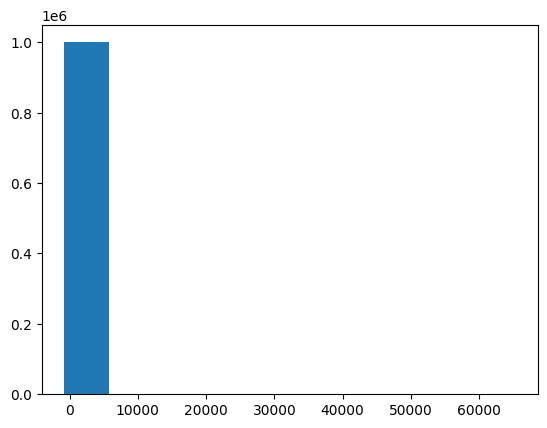

In [10]:
plt.hist(df["TotalPremium"])

In [11]:
df[df["TotalPremium"] == 0]["TotalClaims"].value_counts()

TotalClaims
0.000000        381484
6140.350877         22
850.000000           6
750.649123           3
2294.096491          2
                 ...  
2156.701754          1
18719.903509         1
4436.000000          1
43228.070175         1
7996.535088          1
Name: count, Length: 115, dtype: int64

- Highly abnormal case 
you’re seeing claims being paid without any premium collected.

This might indicate:

A data error

A manual override in claim processing

Policy backdating or administrative issue
- Likely means no policy was written and no claim occurred — this is a neutral or inactive case when claim and premium equals to zero.

In [12]:
data_prep.loss_ratio(df)

In [13]:
df.isnull().sum().sort_values(ascending=False)

LossRatio                   381634
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
cubiccapacity                  552
VehicleType                    552
make                           552
kilowatts                      552
bodytype                       552
Model                          552
mmcode                         552
VehicleIntroDate               552
NumberOfDoors                  552
Cylinders                      552
CapitalOutstanding               2
Country                          0
Province                         0
PostalCode                       0
Citizenship                      0
LegalType                        0
Title                            0
TransactionMonth                 0
PolicyID                         0
UnderwrittenCoverID              0
Language                         0
IsVATRegistered                  0
RegistrationYear    

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending=False)

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured

In [16]:
df["LossRatio"].describe()

count    476189.000000
mean          0.363782
std           9.601549
min         -18.700122
25%           0.000000
50%           0.000000
75%           0.000000
max        2553.600000
Name: LossRatio, dtype: float64

A high loss ratio may indicate financial instability.

<Axes: xlabel='Frequencey', ylabel='ExcessSelected'>

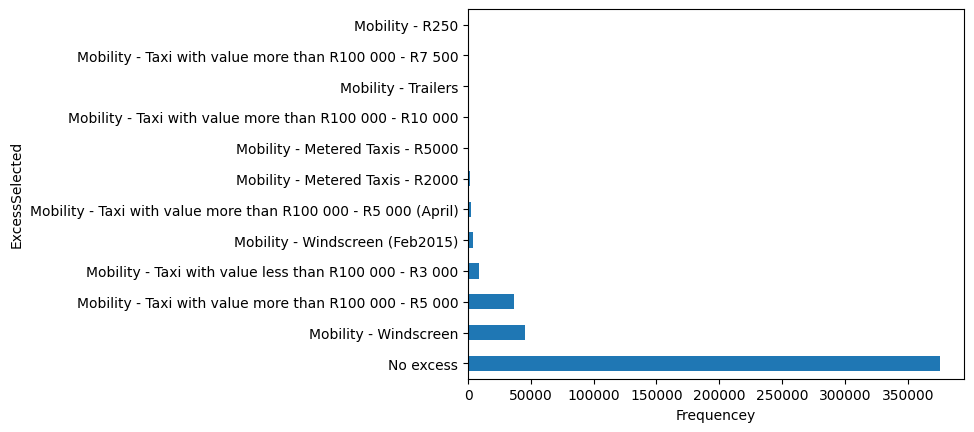

In [17]:
df["ExcessSelected"].value_counts().plot(kind="barh" , xlabel="Frequencey")

In [ ]:
df["C"]

In [18]:
data_prep.check_outlier(df, "CustomValueEstimate")

KeyError: 'CustomValueEstimate'

<Axes: xlabel='ExcessSelected', ylabel='LossRatio'>

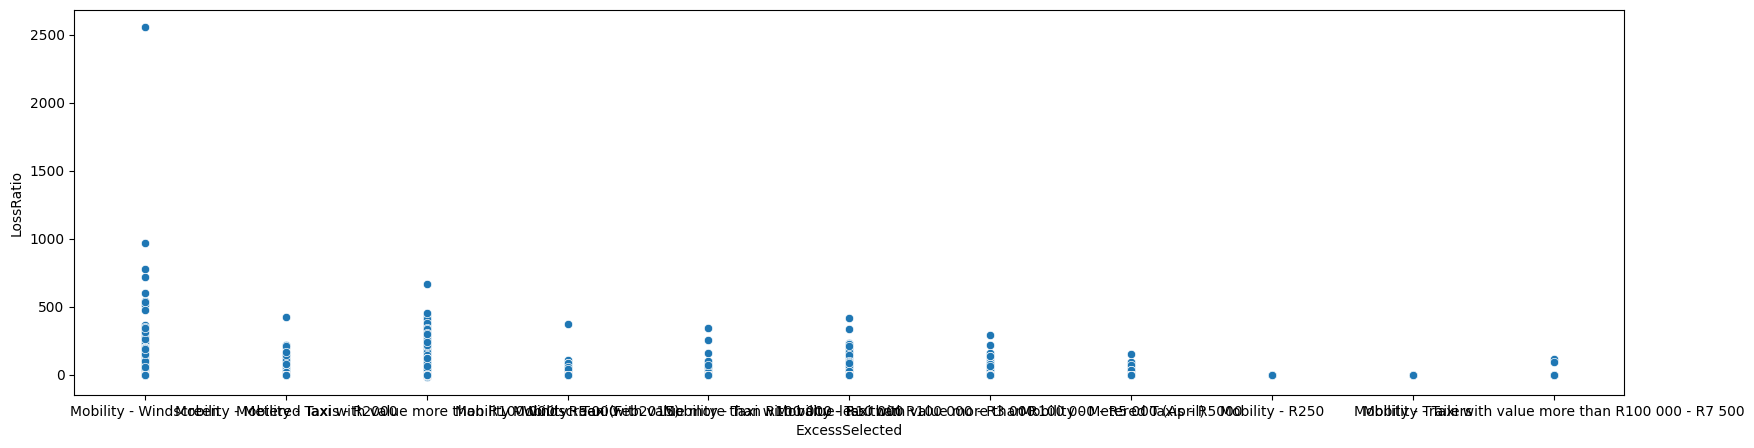

In [13]:
plt.figure(figsize=(20,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df[ df["ExcessSelected"] != "No excess"]["ExcessSelected"])

<Axes: xlabel='Province', ylabel='LossRatio'>

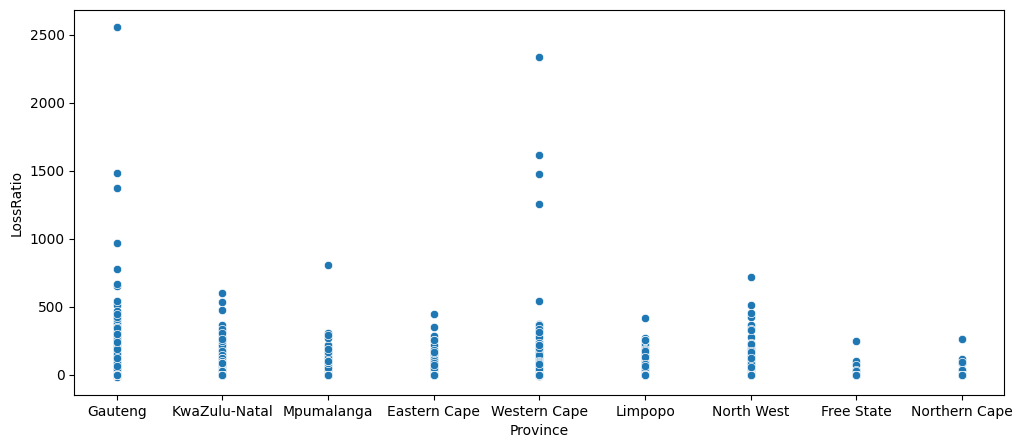

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df["Province"]  )

<Axes: xlabel='VehicleType', ylabel='LossRatio'>

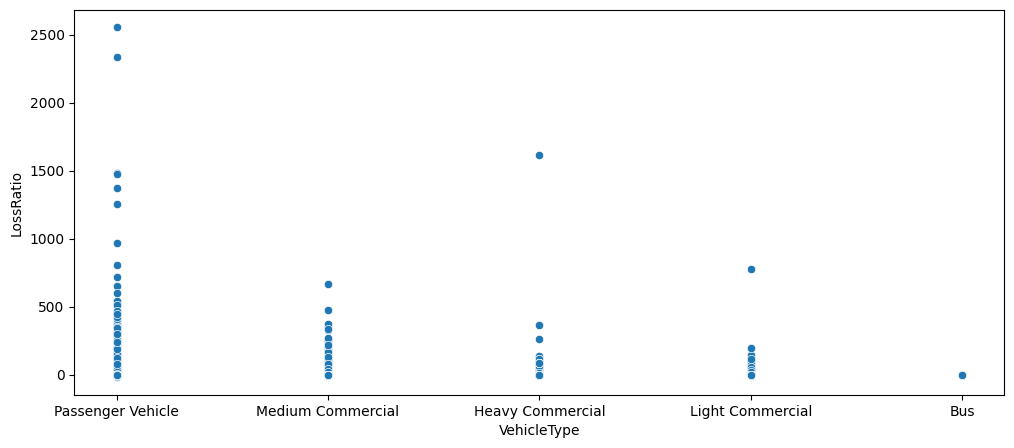

In [15]:
plt.figure(figsize=(12,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df["VehicleType"]  )

<Axes: xlabel='Gender', ylabel='LossRatio'>

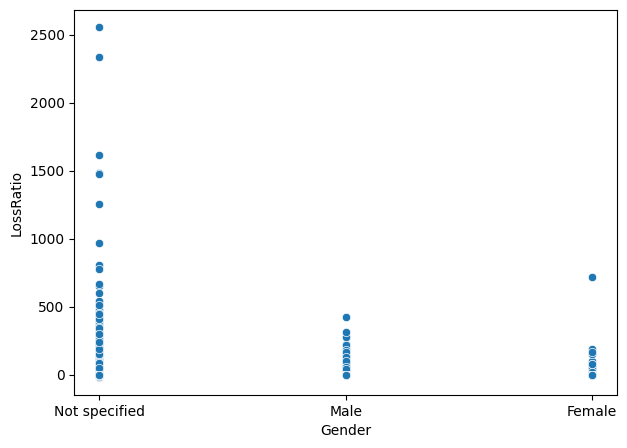

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(y = df["LossRatio"] ,  x= df["Gender"]  )

<Axes: ylabel='CustomValueEstimate'>

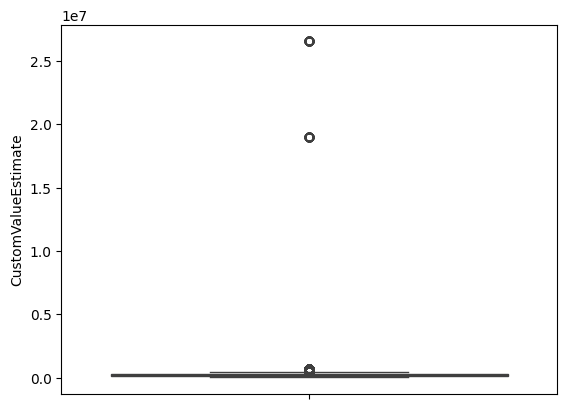

In [17]:
sns.boxplot(df["CustomValueEstimate"])

Custom value Estimate have outlier

In [33]:
df["CustomValueEstimate"].describe()

count    2.204560e+05
mean     2.255311e+05
std      5.645157e+05
min      2.000000e+04
25%      1.350000e+05
50%      2.200000e+05
75%      2.800000e+05
max      2.655000e+07
Name: CustomValueEstimate, dtype: float64

In [41]:
print( "max value" , df["CustomValueEstimate"].max())
upper_bound = df["CustomValueEstimate"].quantile(0.9)
df = df[df["CustomValueEstimate"] <= upper_bound]

max value 26550000.0


<Axes: ylabel='CustomValueEstimate'>

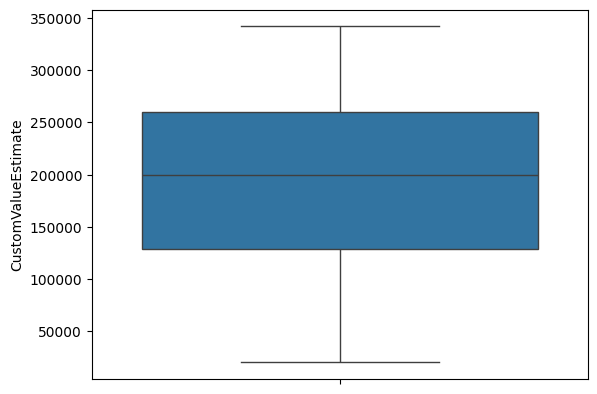

In [42]:
sns.boxplot(df["CustomValueEstimate"])

In [22]:
df["zscore"] = zscore(df["CustomValueEstimate"])
filtered_df= df[df["zscore"].abs() < 3]

In [28]:
df["CustomValueEstimate"]

0          119300.0
1          119300.0
2          119300.0
3          119300.0
4          119300.0
             ...   
1000093         NaN
1000094         NaN
1000095         NaN
1000096         NaN
1000097         NaN
Name: CustomValueEstimate, Length: 1000098, dtype: float64

In [25]:
filtered_df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio,zscore


In [ ]:
sns.boxplot(df["TotalClaims"])

In [ ]:
axs , fig = plt.subplots( 2 , 1 ,figsize =(10, 5))
axs[0,0].plot( df["LossRatio"], df["ExcessSelected"])
sns.scatterplot(y = df["LossRatio"] ,  x= df["Province"])


<Axes: xlabel='TotalPremium', ylabel='Province'>

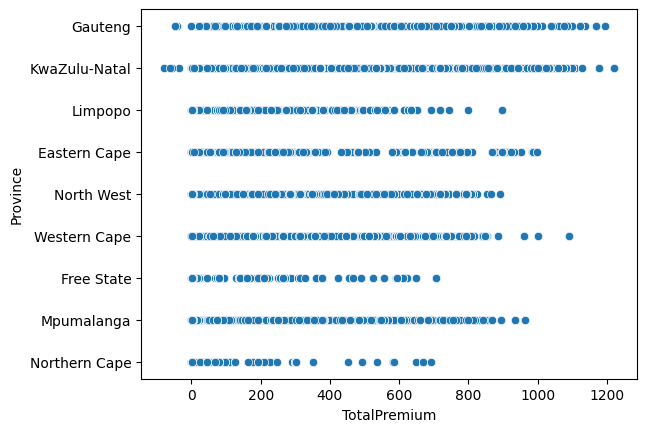

In [50]:
sns.scatterplot(y = df["Province"] ,  x= df["TotalPremium"]  )

<Axes: xlabel='TotalClaims', ylabel='Province'>

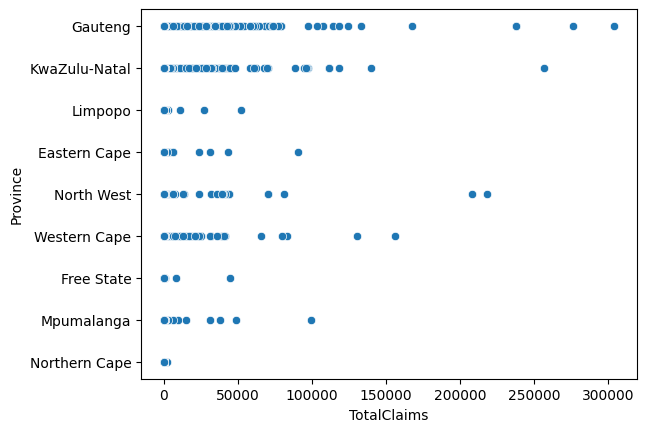

In [51]:
sns.scatterplot(y = df["Province"] ,  x= df["TotalClaims"]  )

<Axes: xlabel='TotalClaims', ylabel='CoverType'>

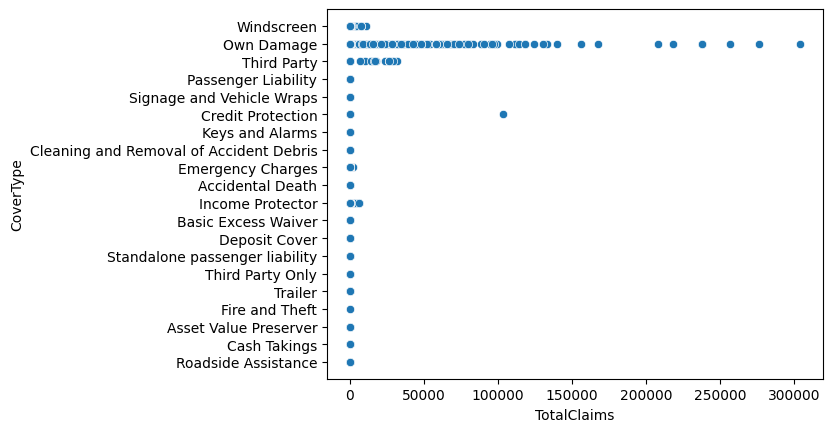

In [48]:
sns.scatterplot(y = df["CoverType"] ,  x= df["TotalClaims"]  )

<Axes: xlabel='TotalPremium', ylabel='CoverType'>

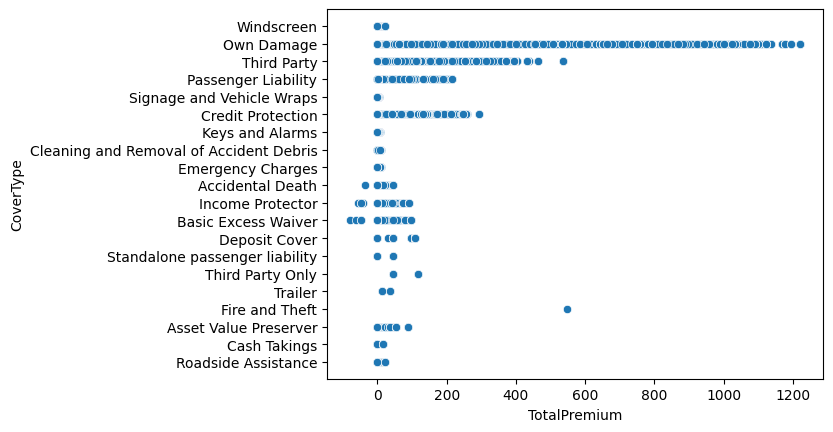

In [46]:
sns.scatterplot(y = df["CoverType"] ,  x= df["TotalPremium"]  )

<Axes: xlabel='TotalClaims', ylabel='VehicleType'>

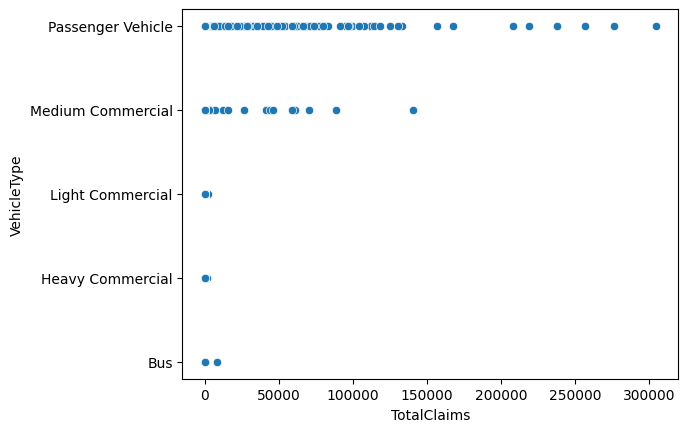

In [75]:
sns.scatterplot(y = df["VehicleType"] ,  x= df["TotalClaims"]  )

<Axes: xlabel='TotalPremium', ylabel='VehicleType'>

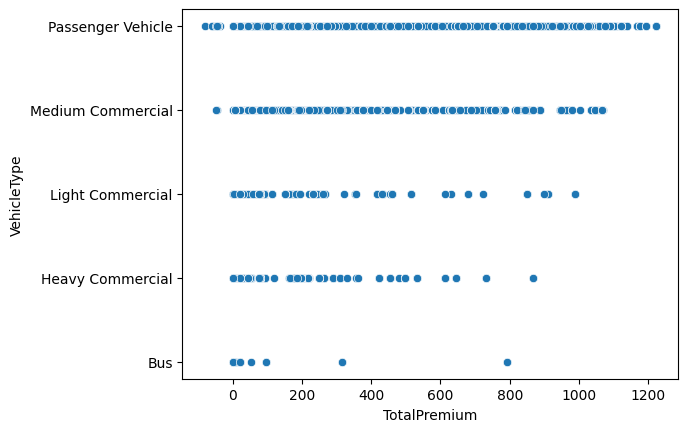

In [74]:
sns.scatterplot(y = df["VehicleType"] ,  x= df["TotalPremium"]  )

In [ ]:
df["Province"].value_counts()

Province
Gauteng          84583
KwaZulu-Natal    47847
North West       22821
Western Cape     22526
Mpumalanga        6488
Limpopo           6193
Eastern Cape      5785
Free State        1770
Northern Cape      472
Name: count, dtype: int64

<Axes: xlabel='CoverType'>

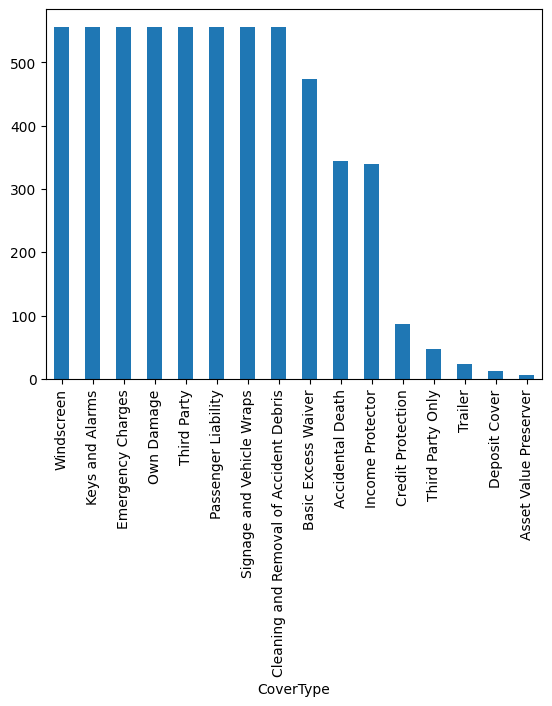

In [89]:
df[df["Province"] == "Eastern Cape"]["CoverType"].value_counts().plot(kind="bar")

In [64]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'LossRatio', 'zscore'],
      dtype='object')


In [73]:
df["VehicleType"].value_counts()

VehicleType
Passenger Vehicle    190635
Medium Commercial      6029
Light Commercial        922
Heavy Commercial        848
Bus                      51
Name: count, dtype: int64

In [72]:
df["PostalCode"].value_counts()

PostalCode
2000    32927
122      6728
299      5568
7405     5096
4000     4098
        ...  
356         8
7888        3
8580        1
7571        1
9762        1
Name: count, Length: 470, dtype: int64

In [69]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

In [81]:
df["Month"] = df["TransactionMonth"].dt.month

In [80]:
df["CoverType"].value_counts()

CoverType
Own Damage                                 20819
Passenger Liability                        20819
Windscreen                                 20780
Third Party                                20214
Signage and Vehicle Wraps                  20213
Keys and Alarms                            20213
Emergency Charges                          20213
Cleaning and Removal of Accident Debris    20198
Income Protector                           13091
Basic Excess Waiver                        11492
Accidental Death                            6469
Credit Protection                           3418
Deposit Cover                                176
Asset Value Preserver                        152
Roadside Assistance                           72
Cash Takings                                  58
Third Party Only                              48
Trailer                                       24
Standalone passenger liability                15
Fire and Theft                                 1
Name: coun

In [91]:
df.sort_values(by="TransactionMonth" , inplace=True)

In [92]:
# Calculate monthly change (diff) per ZipCode
df['PremiumChange'] = df.groupby("PostalCode")['TotalPremium'].diff()
df['ClaimChange'] = df.groupby('PostalCode')['TotalClaims'].diff()

In [93]:
# Filter rows with no missing values
clean_df = df.dropna(subset=['PremiumChange', 'ClaimChange'])

# Compute correlation per ZipCode
zip_corrs = clean_df.groupby('PostalCode')[['PremiumChange', 'ClaimChange']].corr().unstack().iloc[:, 1]

# View correlations
print(zip_corrs)

PostalCode
1            NaN
2            NaN
8            NaN
17           NaN
29           NaN
          ...   
9431         NaN
9499    0.230948
9730         NaN
9745         NaN
9781    0.009915
Name: (PremiumChange, ClaimChange), Length: 467, dtype: float64


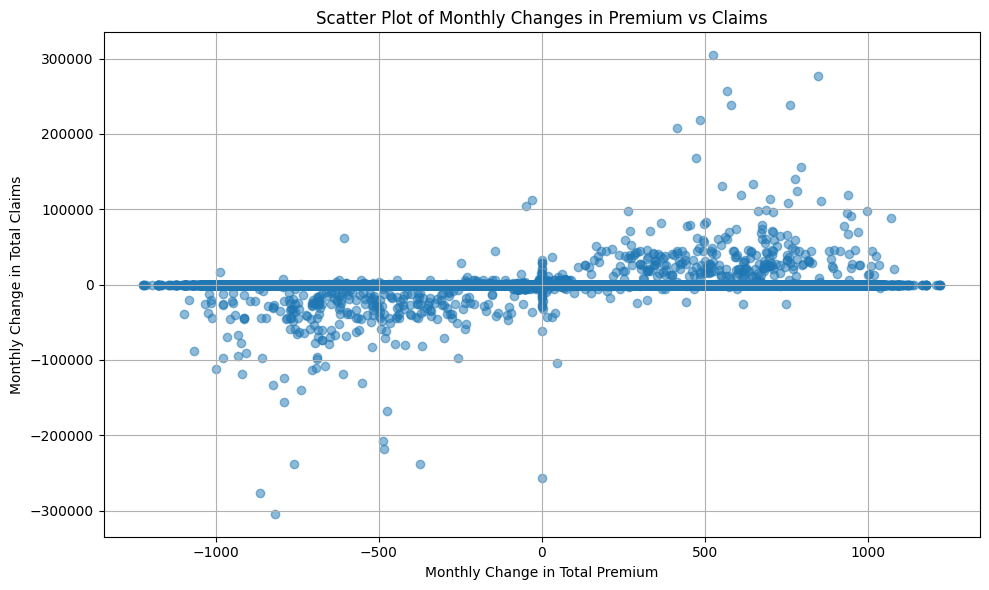

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PremiumChange'], df['ClaimChange'], alpha=0.5)
plt.xlabel("Monthly Change in Total Premium")
plt.ylabel("Monthly Change in Total Claims")
plt.title("Scatter Plot of Monthly Changes in Premium vs Claims")
plt.grid(True)
plt.tight_layout()
plt.show()

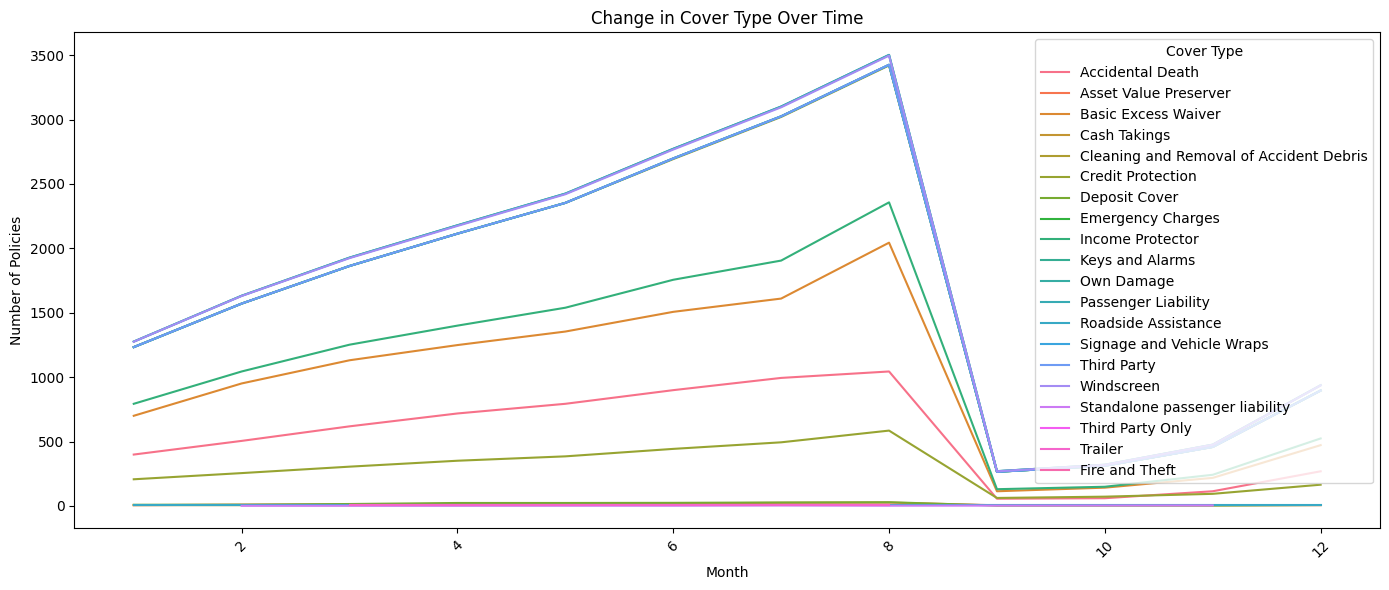

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has columns: 'Month', 'ZipCode', 'CoverType'
df_grouped = df.groupby(['Month', 'CoverType']).size().reset_index(name='Count')

plt.figure(figsize=(14,6))
sns.lineplot(data=df_grouped, x='Month', y='Count', hue='CoverType')
plt.title("Change in Cover Type Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Policies")
plt.legend(title="Cover Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


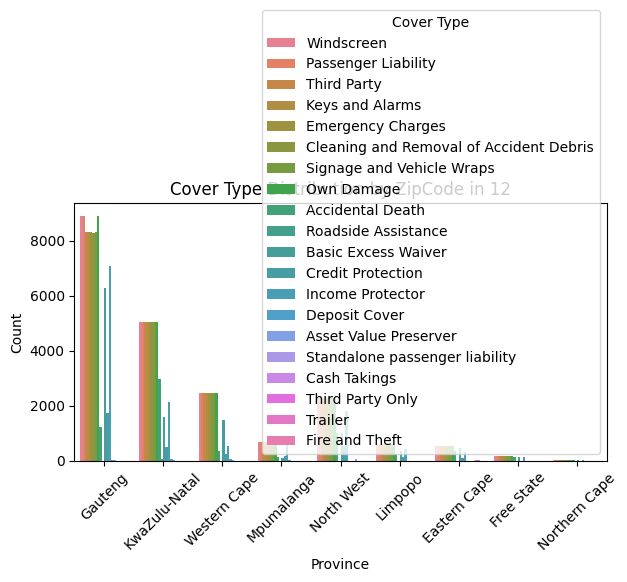

In [104]:
latest_month = df['Month'].max()
df_latest = df[df['Month'] == latest_month]
plt.Figure(figsize=(12,6))
sns.countplot(data=df, x='Province', hue='CoverType')
plt.title(f"Cover Type Distribution by ZipCode in {latest_month}")
plt.xlabel("Province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Cover Type")
plt.tight_layout()
plt.show()
